# Exploratory Data Analysis

## –í—ã–≤–æ–¥—ã –ø–æ –¥–∞–Ω–Ω—ã–º:
* –î–∞—Ç–∞—Å–µ—Ç –≤—ã–≥–ª—è–¥–∏—Ç –æ—á–µ–Ω—å —á–∏—Å—Ç—ã–º —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ NaN –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –¥–ª—è –∑–∞–º–µ–Ω—ã –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –ø—Ä–∏–∑–Ω–∞–∫–æ–º
* –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ: OrdinalEncoder 
* –ù–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ: –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
* –ù–µ–∫–æ—Ç–æ—Ä—ã–µ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –æ –∫–æ—Ç–æ—Ä—ã—Ö –Ω—É–∂–Ω–æ —É–∑–Ω–∞—Ç—å:
    * Agent: ID –∞–≥–µ–Ω—Ç–∞/—Ç—É—Ä—Ñ–∏—Ä–º—ã
    * Lead time: –≤—Ä–µ–º—è –æ—Ç –º–æ–º–µ–Ω—Ç–∞ –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –¥–æ –∑–∞–µ–∑–¥–∞
* –ü–æ—Å–ª–µ–¥–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ *reservation_status* & *reservation_date* –Ω–µ –¥–æ–±–∞–≤–ª–µ–Ω—ã –≤ –∞–ª–≥–æ—Ä–∏—Ç–º, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å *is_cancelled*

In [12]:
import os
from pathlib import Path

import pandas as pd

REPO_DIR = Path(os.path.realpath("")).parent

In [13]:
df = pd.read_parquet(REPO_DIR / "data/raw/hotel_bookings.parquet")

In [14]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
df.is_canceled.value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

–î–∞–Ω–Ω—ã–µ –Ω–µ –≤—ã–≥–ª—è–¥—è—Ç –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏, –ø–æ—ç—Ç–æ–º—É –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–ª—è —ç—Ç–æ–≥–æ –Ω–µ –Ω—É–∂–Ω–∞.

## Features engineering

### –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (NaN)

In [17]:
count_na = df.isna().sum(axis=0)
count_na[count_na != 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

### Categorical values

**Meal**

–¢–∏–ø –ø–∏—Ç–∞–Ω–∏—è

In [18]:
len(df.meal.unique())

5

**Countries**

In [19]:
len(df.country.unique())

178

–ú–Ω–æ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π: —Ä–∏—Å–∫ –ø—Ä–æ–∫–ª—è—Ç–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ one-hot encoder. –ü–æ–ø—Ä–æ–±—É–µ–º OrdinalEncoder, –∞ –µ—Å–ª–∏ –æ–Ω –Ω–µ —Å—Ä–∞–±–æ—Ç–∞–µ—Ç —Ö–æ—Ä–æ—à–æ, —Ç–æ TargetEncoder.

**Market segment**

–†—ã–Ω–æ—á–Ω—ã–π —Å–µ–≥–º–µ–Ω—Ç

In [20]:
len(df.market_segment.unique())

8

In [21]:
df.market_segment.value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

### Distribution channel 

–ö–∞–Ω–∞–ª —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

In [22]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [23]:
df.distribution_channel.value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

### –¢–∏–ø –∑–∞–±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –∫–æ–º–Ω–∞—Ç—ã –∏ –Ω–∞–∑–Ω–∞—á–µ–Ω–Ω–æ–π –∫–æ–º–Ω–∞—Ç—ã

Reserved room type & Assigned room type

In [24]:
len(df.reserved_room_type.unique())

10

In [25]:
len(df.assigned_room_type.unique())

12

### –ò–∑–º–µ–Ω–µ–Ω–∏—è –≤ –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–∏

–ü–æ—Ö–æ–∂–µ, —á—Ç–æ —ç—Ç–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

In [26]:
df.booking_changes.value_counts()

booking_changes
0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: count, dtype: int64

–í—ã–±—Ä–æ—Å—ã. –ù–µ –±—É–¥–µ–º —É—á–∏—Ç—ã–≤–∞—Ç—å –∏—Ö –ø—Ä–∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–µ

### Deposit type

In [27]:
df.deposit_type.value_counts()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

### –ê–≥–µ–Ω—Ç

–ê–≥–µ–Ω—Ç –≤—ã–≥–ª—è–¥–∏—Ç –∫–∞–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ. –í–æ–∑–º–æ–∂–Ω–æ, —ç—Ç–æ –ø–æ—Å—Ä–µ–¥–Ω–∏–∫ –¥–ª—è –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è.

In [28]:
len(df.agent.unique())

334

### –ö–æ–º–ø–∞–Ω–∏—è

In [29]:
len(df.company.unique())

353

In [30]:
df.company.value_counts()

company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: count, Length: 352, dtype: int64

### –¢–∏–ø –∫–ª–∏–µ–Ω—Ç–∞

In [31]:
df.customer_type.value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

### –°—Ç–∞—Ç—É—Å –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è

In [32]:
df.reservation_status.value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

–°—Ç–æ–∏—Ç –ª–∏ –¥–æ–±–∞–≤–ª—è—Ç—å –≤ –º–æ–¥–µ–ª—å? –ù–∞–≤–µ—Ä–Ω–æ–µ, –Ω–µ—Ç, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –Ω–∞–ø—Ä—è–º—É—é –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å *is_canceled*

## –ü—Ä–∏—á–∏–Ω–Ω–æ-—Å–ª–µ–¥—Å—Ç–≤–µ–Ω–Ω—ã–µ —Å–≤—è–∑–∏
Causality


–ü—Ä–æ–≤–µ—Ä—è–µ–º –ø—Ä–∏—á–∏–Ω–Ω–æ-—Å–ª–µ–¥—Å—Ç–≤–µ–Ω–Ω—ã–µ —Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏

Check the causality between

In [33]:
causal_df = df[["is_canceled", "deposit_type", "reservation_status"]]
causal_df.sample(10)

is_canceled deposit_type reservation_status
50654             1   Non Refund           Canceled
78136             0   No Deposit          Check-Out
116165            0   No Deposit          Check-Out
43938             1   Non Refund           Canceled
6058              1   No Deposit           Canceled
33763             0   No Deposit          Check-Out
50827             1   No Deposit           Canceled
19210             1   Non Refund           Canceled
23918             0   No Deposit          Check-Out
17856             0   No Deposit          Check-Out

–°—Ç–∞—Ç—É—Å –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –æ—á–µ–≤–∏–¥–Ω–æ —Å–≤—è–∑–∞–Ω —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π ("Canceled")

In [34]:
# Check causality between a reservation canceled and Non Refund reservation.
is_canceled_df = causal_df.loc[causal_df["deposit_type"] == "Non Refund"]
is_canceled_df["is_canceled"].sum() / len(is_canceled_df)

0.9936244601357374

–ü–æ—á—Ç–∏ –∫–∞–∂–¥—ã–π —Ä–∞–∑, –∫–æ–≥–¥–∞ –¥–µ–ø–æ–∑–∏—Ç –Ω–µ –≤–æ–∑–≤—Ä–∞—â–∞–ª—Å—è, —ç—Ç–æ –±—ã–ª–æ –∏–∑-–∑–∞ –æ—Ç–º–µ–Ω—ã, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –ø—Ä–∏—á–∏–Ω–Ω–æ-—Å–ª–µ–¥—Å—Ç–≤–µ–Ω–Ω—É—é —Å–≤—è–∑—å.

In [35]:
%%latex
$$
encoding_{j} = countTarget1_{j} / totalOccurence_{j} 
$$

<IPython.core.display.Latex object>

##  –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Å—Ç–∏–ª—è –≥—Ä–∞—Ñ–∏–∫–æ–≤
plt.style.use('default')
sns.set_palette("husl")

###  –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

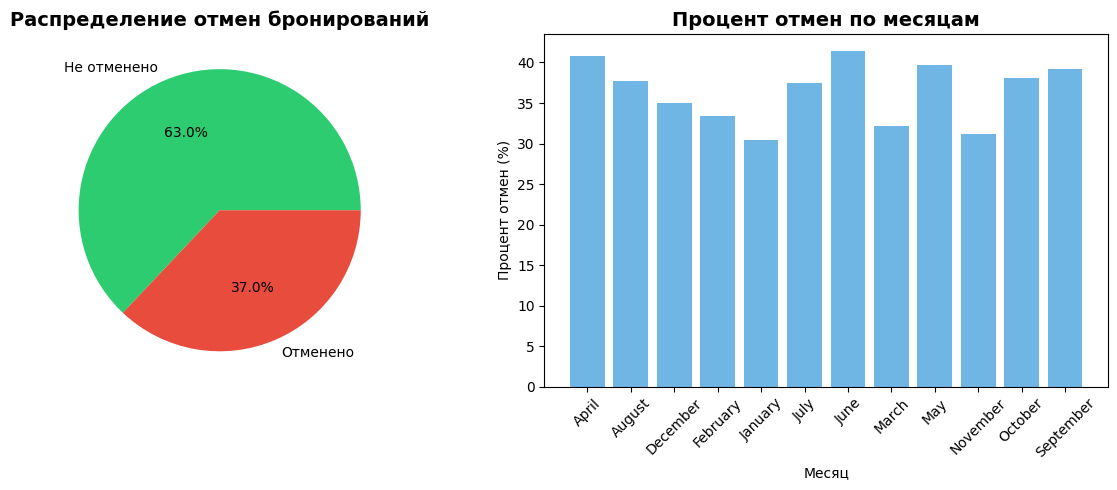

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Countplot –¥–ª—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
ax1.pie(df['is_canceled'].value_counts(), 
        labels=['–ù–µ –æ—Ç–º–µ–Ω–µ–Ω–æ', '–û—Ç–º–µ–Ω–µ–Ω–æ'],
        autopct='%1.1f%%', 
        colors=['#2ecc71', '#e74c3c'])
ax1.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–º–µ–Ω –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–π', fontsize=14, fontweight='bold')

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –ø–æ –º–µ—Å—è—Ü–∞–º
monthly_data = df.groupby('arrival_date_month')['is_canceled'].agg(['count', 'sum']).reset_index()
monthly_data['cancel_rate'] = monthly_data['sum'] / monthly_data['count'] * 100

ax2.bar(monthly_data['arrival_date_month'], monthly_data['cancel_rate'], 
        color='#3498db', alpha=0.7)
ax2.set_title('–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç–º–µ–Ω –ø–æ –º–µ—Å—è—Ü–∞–º', fontsize=14, fontweight='bold')
ax2.set_xlabel('–ú–µ—Å—è—Ü')
ax2.set_ylabel('–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç–º–µ–Ω (%)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

###  –ö–ª—é—á–µ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

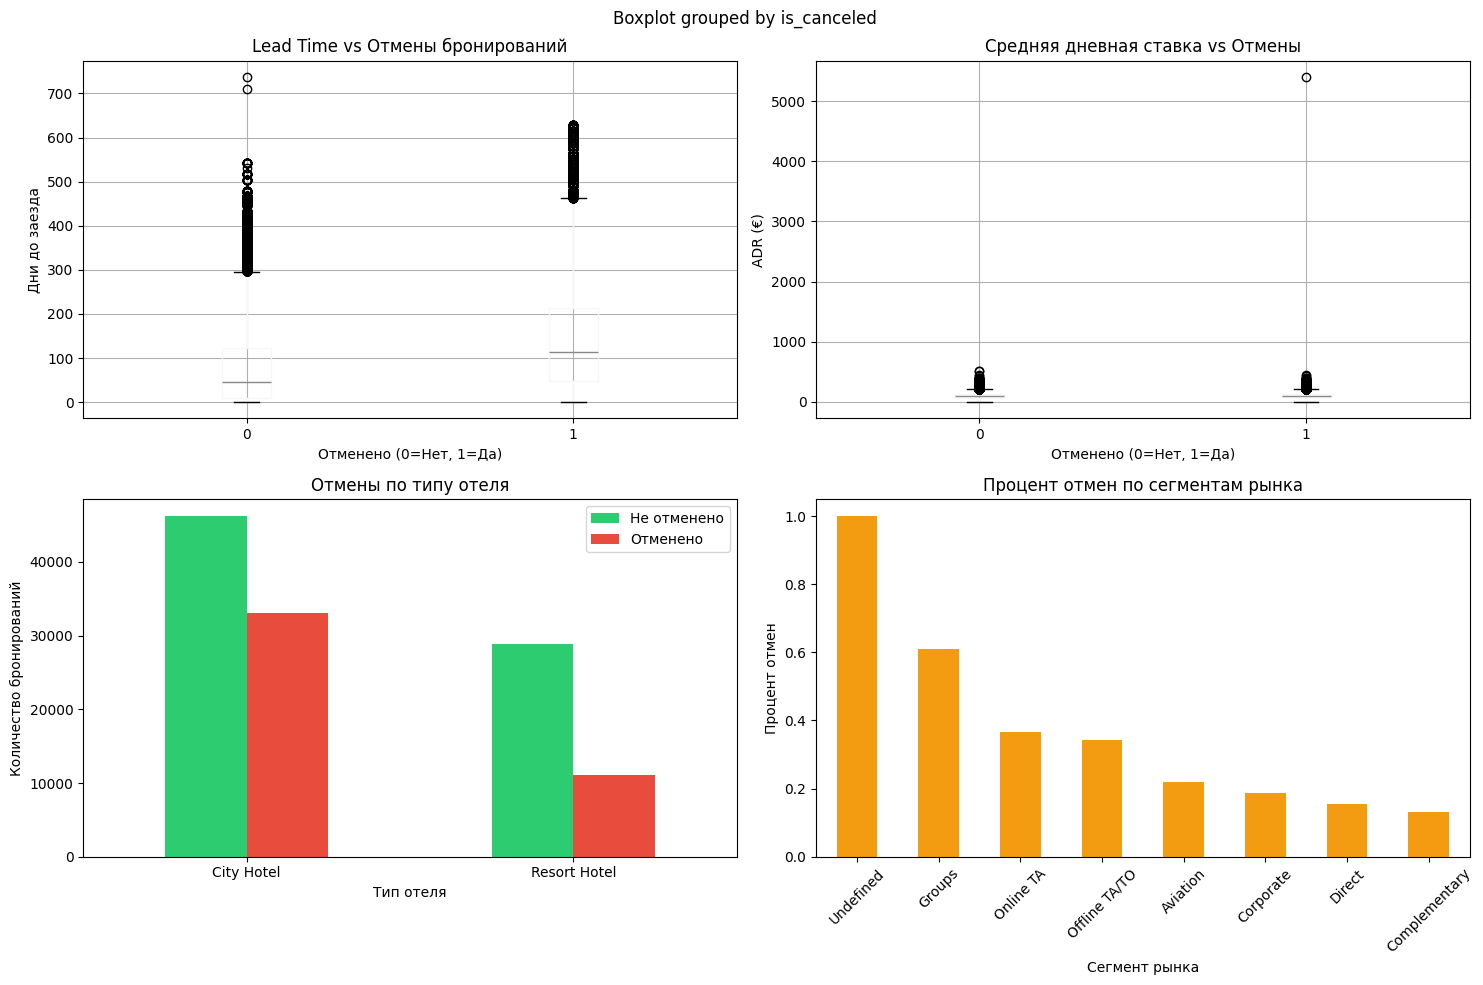

In [43]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Lead time vs Cancellation
df.boxplot(column='lead_time', by='is_canceled', ax=ax1)
ax1.set_title('Lead Time vs –û—Ç–º–µ–Ω—ã –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–π')
ax1.set_xlabel('–û—Ç–º–µ–Ω–µ–Ω–æ (0=–ù–µ—Ç, 1=–î–∞)')
ax1.set_ylabel('–î–Ω–∏ –¥–æ –∑–∞–µ–∑–¥–∞')

# ADR vs Cancellation  
df.boxplot(column='adr', by='is_canceled', ax=ax2)
ax2.set_title('–°—Ä–µ–¥–Ω—è—è –¥–Ω–µ–≤–Ω–∞—è —Å—Ç–∞–≤–∫–∞ vs –û—Ç–º–µ–Ω—ã')
ax2.set_xlabel('–û—Ç–º–µ–Ω–µ–Ω–æ (0=–ù–µ—Ç, 1=–î–∞)')
ax2.set_ylabel('ADR (‚Ç¨)')

# Hotel type
hotel_cancel = df.groupby(['hotel', 'is_canceled']).size().unstack()
hotel_cancel.plot(kind='bar', ax=ax3, color=['#2ecc71', '#e74c3c'])
ax3.set_title('–û—Ç–º–µ–Ω—ã –ø–æ —Ç–∏–ø—É –æ—Ç–µ–ª—è')
ax3.set_xlabel('–¢–∏–ø –æ—Ç–µ–ª—è')
ax3.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–π')
ax3.legend(['–ù–µ –æ—Ç–º–µ–Ω–µ–Ω–æ', '–û—Ç–º–µ–Ω–µ–Ω–æ'])
ax3.tick_params(axis='x', rotation=0)

# Market segment
market_cancel_rate = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)
market_cancel_rate.plot(kind='bar', ax=ax4, color='#f39c12')
ax4.set_title('–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç–º–µ–Ω –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º —Ä—ã–Ω–∫–∞')
ax4.set_xlabel('–°–µ–≥–º–µ–Ω—Ç —Ä—ã–Ω–∫–∞')
ax4.set_ylabel('–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç–º–µ–Ω')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

###  Heatmap –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π

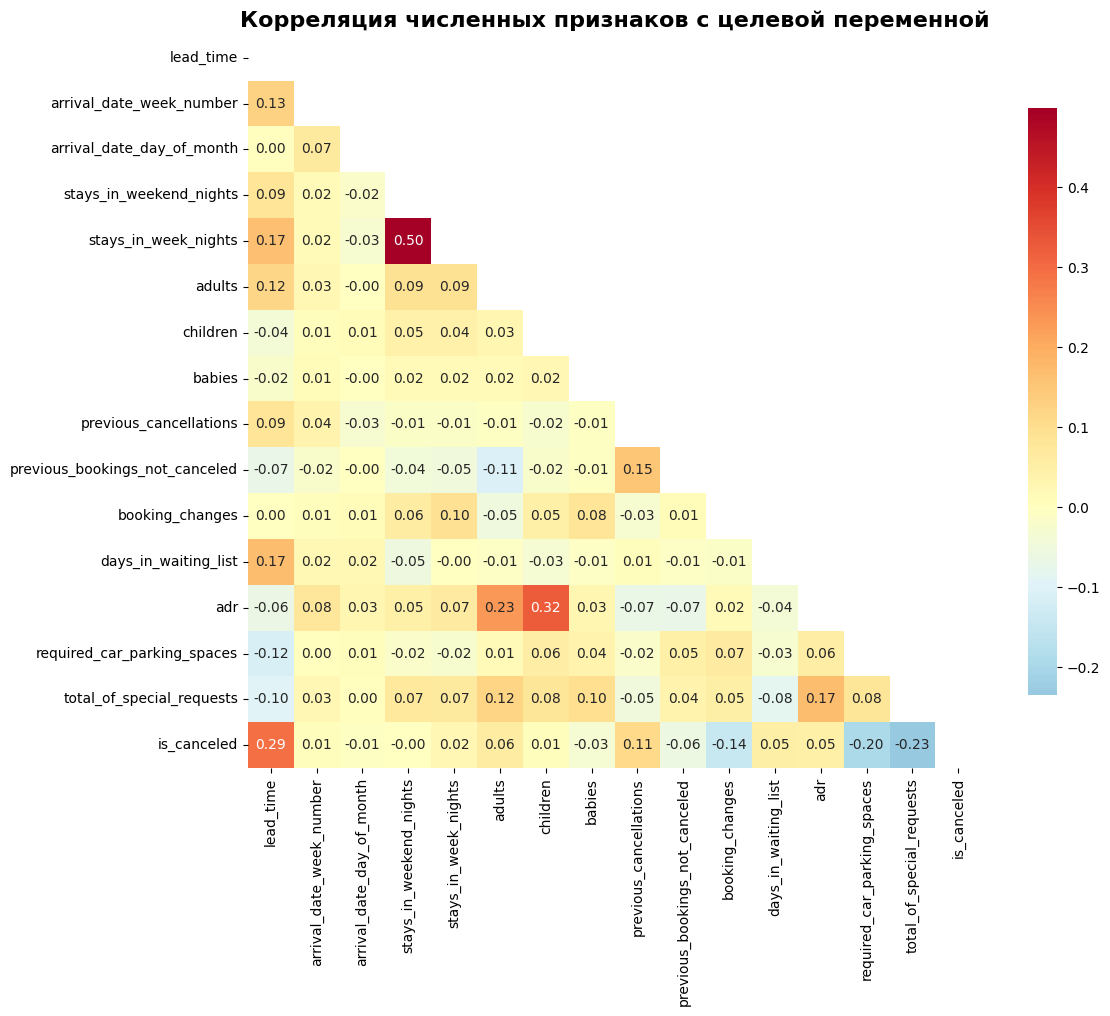

üéØ –¢–æ–ø-10 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å –æ—Ç–º–µ–Ω–∞–º–∏:
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
Name: is_canceled, dtype: float64


In [44]:
# –í—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–µ–Ω–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –¥–ª—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
numeric_cols = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
                'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
                'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
                'booking_changes', 'days_in_waiting_list', 'adr', 
                'required_car_parking_spaces', 'total_of_special_requests', 'is_canceled']

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —á–∏—Å–ª–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# –¢–æ–ø –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π —Å is_canceled
target_corr = correlation_matrix['is_canceled'].abs().sort_values(ascending=False)[1:]
print("üéØ –¢–æ–ø-10 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å –æ—Ç–º–µ–Ω–∞–º–∏:")
print(target_corr.head(10))

In [42]:
import numpy as np